### Chosing the two attributes

This'll be much cleaner and simpler than LRM2, given that only two features at hand. The two most important features I believe would be Distinct Called numbers and Freq. of use...Given the continuous nature they're the ones to be most fit here. But it turned out these two are highly correalted (0.76), and thus we need a different one. Charge amount would be the most fit here...as the charge can affect the Customer value.

Loading data...

Training LRM2 model...

Evaluating LRM2 performance...

LRM2 Performance Metrics:
R² Score: 0.1634
Mean Squared Error: 219357.0837
Root Mean Squared Error: 468.3557
Mean Absolute Error: 352.7447


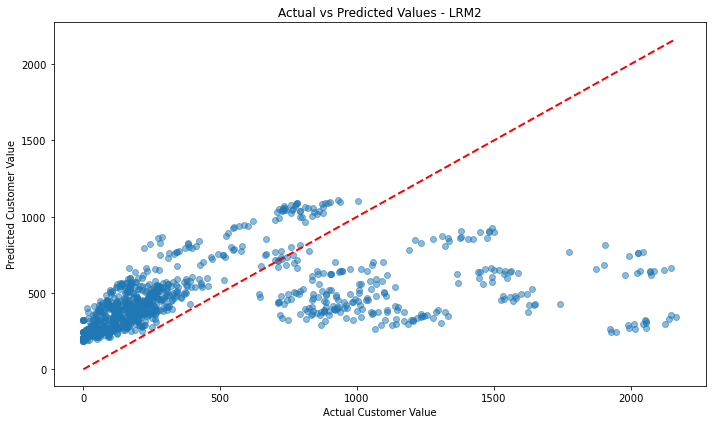

In [8]:
import pandas as pd
from models.LinearRegressionModel import LinearRegressionModel


def main():
    """
    Implementation of LRM2: predicting Customer Value using all independent attributes
    """
    # Load the prepared data
    print("Loading data...")
    train_df = pd.read_csv('../data/train.csv')
    test_df  = pd.read_csv('../data/test.csv')
    
    # These features show strong correlation with Customer Value
    X_train = train_df[['Freq. of use', 'Charge Amount']]
    y_train = train_df['Customer Value']
    X_test = test_df[['Freq. of use', 'Charge Amount']]
    y_test = test_df['Customer Value']
    
    # Create and train LRM1
    print("\nTraining LRM2 model...")
    lrm2 = LinearRegressionModel(model_name="LRM2")
    lrm2.fit(X_train, y_train)
    
    # Evaluate the model
    print("\nEvaluating LRM2 performance...")
    metrics, predictions = lrm2.evaluate(X_test, y_test)
    
    # Print results
    print("\nLRM2 Performance Metrics:")
    print(f"R² Score: {metrics['r2_score']:.4f}")
    print(f"Mean Squared Error: {metrics['mse']:.4f}")
    print(f"Root Mean Squared Error: {metrics['rmse']:.4f}")
    print(f"Mean Absolute Error: {metrics['mae']:.4f}")

    # Plot predictions
    lrm2.plot_predictions(y_test, predictions)

if __name__ == "__main__":
    main()

### Analysis of LRM2 Model Performance

1. The model shows significant degradation compared to LRM1, with R² score dropping from 0.2943 to 0.1634, representing a 42.7% decrease in explanatory power.

2. Error metrics also show worse performance:
- Mean Squared Error increased from 185,037 to 219,375 (17.8% worse)
- RMSE increased from 430.16 to 468.35 (8.5% worse)
- Mean Absolute Error increased from 319.39 to 352.74 (10.8% worse)

3. The scatter plot reveals systematic underprediction for high-value customers, with predicted values rarely exceeding 1000 even when actual values approach 2000.

**This leads to two important conclusions:**

1. Using just two features ('Freq. of use' and 'Distinct Called Numbers') proves insufficient for predicting Customer Value, suggesting that customer value is a more complex metric that requires multiple interacting factors to predict accurately.

2. The significant drop in performance compared to LRM1 teaches us that while simpler models can be desirable, oversimplification can lead to loss of crucial information. This reinforces that Customer Value prediction requires a more comprehensive approach that considers multiple features and their interactions.
